In [13]:
import os
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt #importing libraries

In [2]:
def load_images_from_folder(folder): #loads mask images from the database
    images = []
    for i in range(1,601):
        filename = "Mask ("+str(i)+").tif"
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [5]:
masks = load_images_from_folder("medgift_ild_db/mask")

In [6]:
maskg = []
for i in range(600):    
    maskg.append(cv2.cvtColor(masks[i], cv2.COLOR_BGR2GRAY))

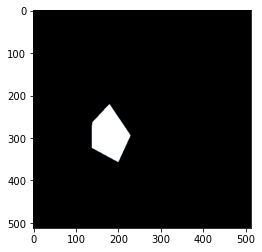

In [7]:
plt.imshow(maskg[179], cmap=plt.cm.bone)
plt.show()

In [8]:
def load_dicom_images_from_folder(folder): #loads lung images from the database
    images = []
    for i in range(1,601):
        filename = "Image ("+str(i)+").dcm"
        data = pydicom.dcmread(os.path.join(folder,filename))
        img = data.pixel_array
        if img is not None:
            images.append(img)
    return images

In [9]:
images = load_dicom_images_from_folder("medgift_ild_db/images")

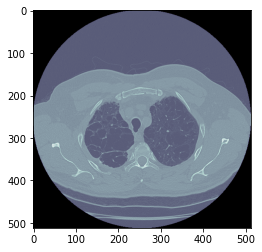

In [10]:
plt.imshow(images[179], cmap=plt.cm.bone)
plt.show()

In [11]:
idx = [] #this array marks those images where there is a size inconsistency. [] 0 in output represents none.
count = 0
for i in range(600):
    if(images[i].shape != maskg[i].shape):
        idx.append(i)
        count+=1
print(idx,count)

[] 0


In [14]:
ildimg = [] #actual region of interest
for i in range(600): 
    if i not in idx:
        ildimg.append(np.multiply(images[i],maskg[i])) #element-wise

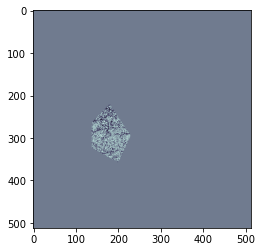

In [15]:
plt.imshow(ildimg[179], cmap=plt.cm.bone)
plt.show()

In [17]:
path = './roi_images' #saving these images in a folder
for i in range(len(ildimg)):
    cv2.imwrite(os.path.join(path,str(i)+'.jpg'), ildimg[i])
    cv2.waitKey(0)